In [ ]:
import pandas as pd

## Loading the dataset

In [ ]:
data = pd.read_csv("dataset.csv")

In [ ]:
data.head()

Year Quarter  GDP_Growth  Inflation  Industrial_Production  Job_Market  \
0  2016      Q1    3.866202   5.795522               4.063915       72806   
1  2013      Q1    6.624839   4.008880               0.301156       51465   
2  2022      Q4    3.469627   6.322668              -3.622371       64109   
3  2020      Q3    3.907552   1.415962              -1.309438       53528   
4  2017      Q4    1.586789   1.885589               2.220974       39230   

   Recession_Indicator  
0                    0  
1                    0  
2                    0  
3                    1  
4                    0

## Preprocessing


In [ ]:
data.isnull().sum()

Year                     0
Quarter                  0
GDP_Growth               0
Inflation                0
Industrial_Production    0
Job_Market               0
Recession_Indicator      0
dtype: int64

#### Clearly Visible , there is no null , so our data is cleaned then proceeding to select features and target

#### Let's transform Quarter character values into integer for numerical data

In [ ]:
X = data[['Year','Quarter','GDP_Growth','Inflation', 'Industrial_Production', 'Job_Market']]

In [ ]:
y = data['Recession_Indicator']

In [ ]:
X

Year Quarter  GDP_Growth  Inflation  Industrial_Production  Job_Market
0     2016      Q1    3.866202   5.795522               4.063915       72806
1     2013      Q1    6.624839   4.008880               0.301156       51465
2     2022      Q4    3.469627   6.322668              -3.622371       64109
3     2020      Q3    3.907552   1.415962              -1.309438       53528
4     2017      Q4    1.586789   1.885589               2.220974       39230
...    ...     ...         ...        ...                    ...         ...
2995  2021      Q1    3.154164  12.653804               0.783076       43332
2996  2020      Q3    6.825993   2.673752               2.006138       10066
2997  2017      Q4    8.714885  13.569079               1.546320       42313
2998  2011      Q4    2.374860   5.110002              -4.509416       70857
2999  2015      Q1    9.789196   5.656680              -3.963961       48900

[3000 rows x 6 columns]

In [ ]:
y

0       0
1       0
2       0
3       1
4       0
       ..
2995    1
2996    1
2997    0
2998    0
2999    0
Name: Recession_Indicator, Length: 3000, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

### GDP Growth over time


In [ ]:
df=data

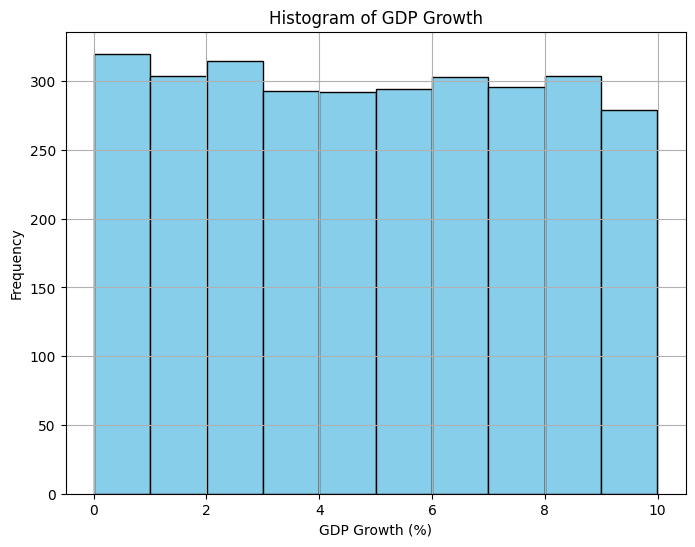

In [ ]:
# Histogram for GDP Growth
plt.figure(figsize=(8, 6))
plt.hist(df['GDP_Growth'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of GDP Growth')
plt.xlabel('GDP Growth (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


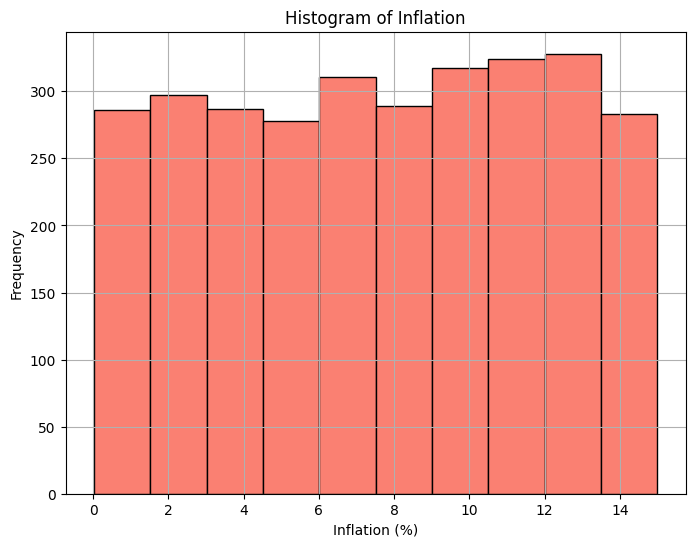

In [ ]:
# Histogram for Inflation
plt.figure(figsize=(8, 6))
plt.hist(df['Inflation'], bins=10, color='salmon', edgecolor='black')
plt.title('Histogram of Inflation')
plt.xlabel('Inflation (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

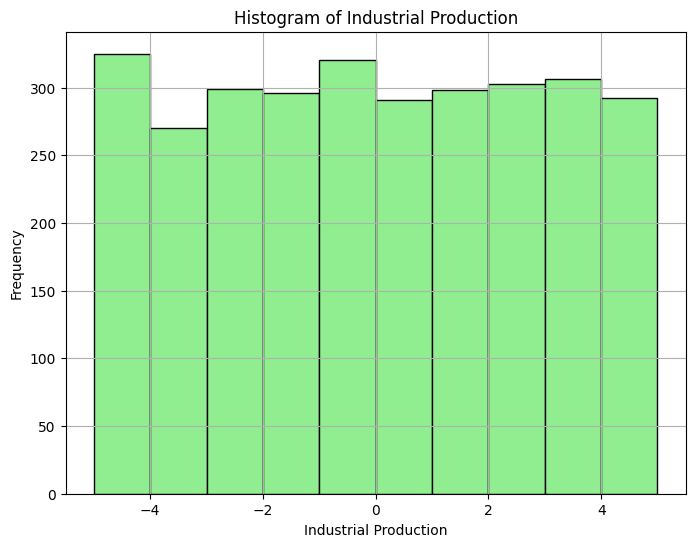

In [ ]:
# Histogram for Industrial Production
plt.figure(figsize=(8, 6))
plt.hist(df['Industrial_Production'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Histogram of Industrial Production')
plt.xlabel('Industrial Production')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

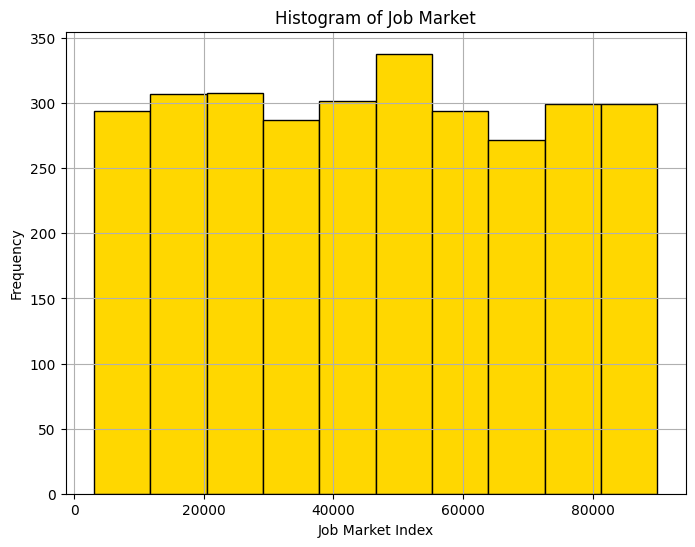

In [ ]:
# Histogram for Job Market
plt.figure(figsize=(8, 6))
plt.hist(df['Job_Market'], bins=10, color='gold', edgecolor='black')
plt.title('Histogram of Job Market')
plt.xlabel('Job Market Index')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

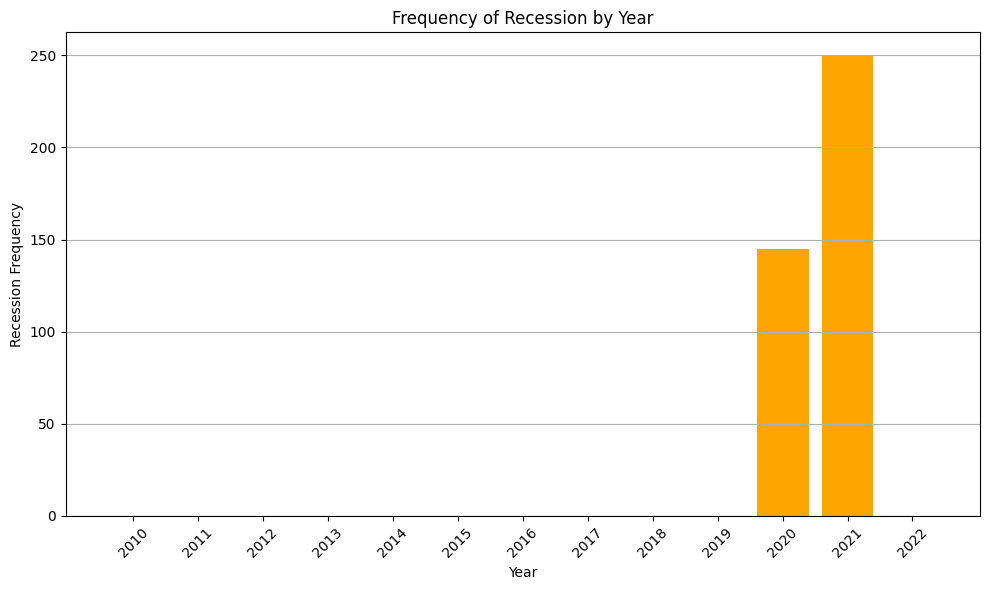

In [ ]:
# Grouping by year and counting occurrences of recession
recession_counts = df.groupby('Year')['Recession_Indicator'].sum()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(recession_counts.index.astype(str), recession_counts, color='orange')
plt.title('Frequency of Recession by Year')
plt.xlabel('Year')
plt.ylabel('Recession Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

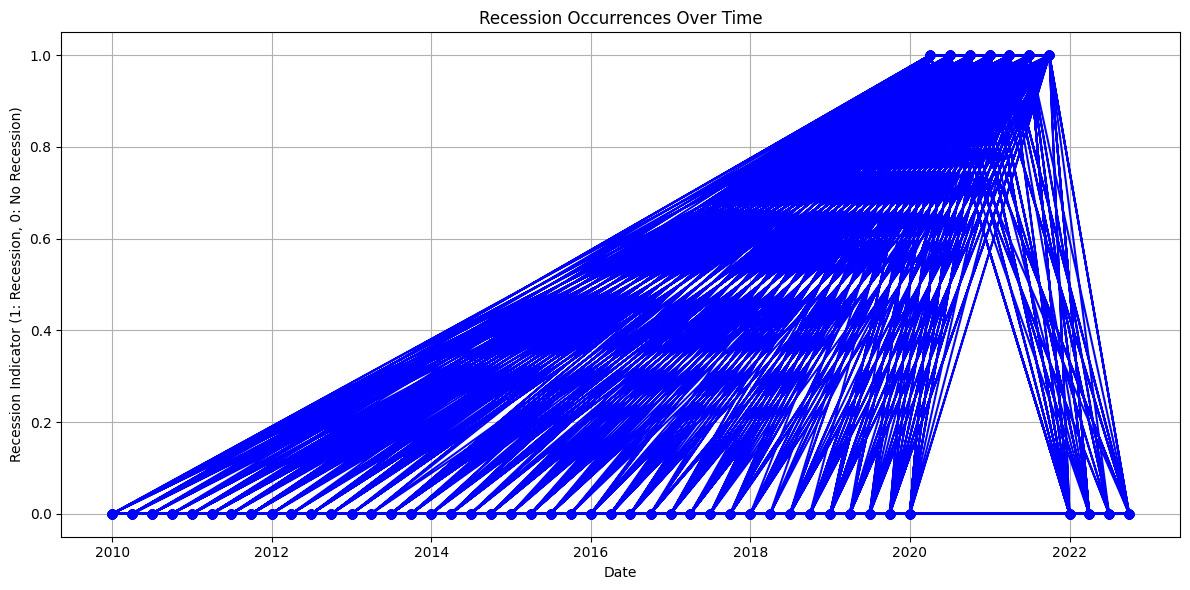

In [ ]:
import matplotlib.pyplot as plt

# Convert Year and Quarter to datetime
df['Date'] = pd.to_datetime(df['Year'].astype(str) + df['Quarter'])

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Recession_Indicator'], marker='o', linestyle='-', color='blue')
plt.title('Recession Occurrences Over Time')
plt.xlabel('Date')
plt.ylabel('Recession Indicator (1: Recession, 0: No Recession)')
plt.grid(True)
plt.tight_layout()
plt.show()


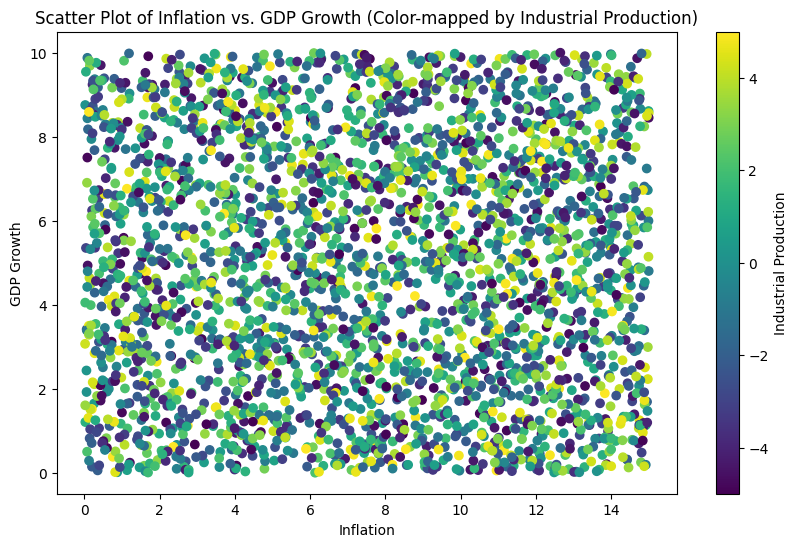

In [ ]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Inflation'], df['GDP_Growth'], c=df['Industrial_Production'], cmap='viridis')
plt.xlabel('Inflation')
plt.ylabel('GDP Growth')
plt.title('Scatter Plot of Inflation vs. GDP Growth (Color-mapped by Industrial Production)')
plt.colorbar(label='Industrial Production')
plt.show()

<ipython-input-21-1185c2b69605>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  count_0 = len(recession_years[recession_years['Quarter'] == quarter][recession_years['Recession_Indicator'] == 0])
<ipython-input-21-1185c2b69605>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  count_1 = len(recession_years[recession_years['Quarter'] == quarter][recession_years['Recession_Indicator'] == 1])


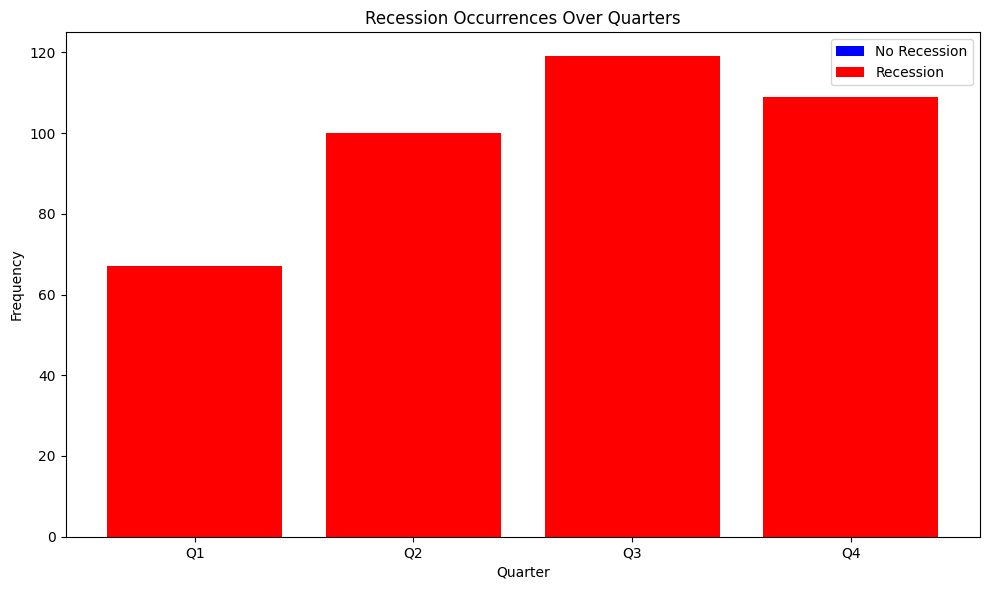

In [ ]:
# Filter dataframe to include only years where recession occurred
recession_years = df[df['Recession_Indicator'] == 1]

# Plotting
plt.figure(figsize=(10, 6))
quarters = ['Q1', 'Q2', 'Q3', 'Q4']

for quarter in quarters:
    # Count occurrences of recession indicator for each quarter
    count_0 = len(recession_years[recession_years['Quarter'] == quarter][recession_years['Recession_Indicator'] == 0])
    count_1 = len(recession_years[recession_years['Quarter'] == quarter][recession_years['Recession_Indicator'] == 1])

    # Plotting bars
    plt.bar(quarter, count_0, color='blue', label='No Recession' if quarter == 'Q1' else '')
    plt.bar(quarter, count_1, bottom=count_0, color='red', label='Recession' if quarter == 'Q1' else '')

plt.title('Recession Occurrences Over Quarters')
plt.xlabel('Quarter')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()


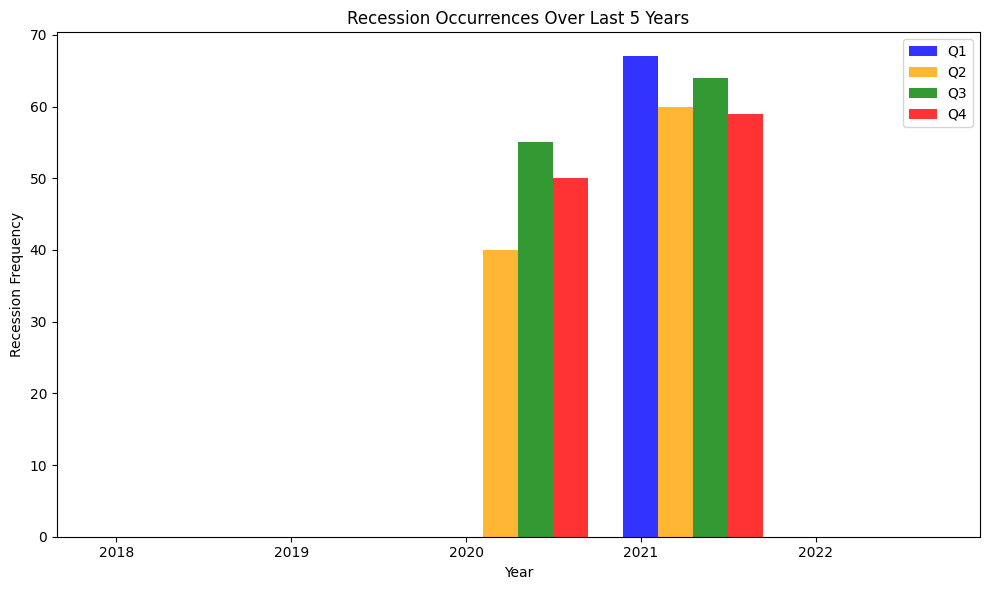

In [ ]:
# Filter dataframe to include only the last 5 years
last_5_years_df = df[df['Year'] >= df['Year'].max() - 4]

# Grouping by year and quarter and counting occurrences of recession
recession_counts = last_5_years_df.groupby(['Year', 'Quarter'])['Recession_Indicator'].sum().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))

quarters = ['Q1', 'Q2', 'Q3', 'Q4']
bar_width = 0.2
opacity = 0.8
index = range(len(recession_counts))

colors = ['blue', 'orange', 'green', 'red']

for i, quarter in enumerate(quarters):
    plt.bar([x + i * bar_width for x in index], recession_counts[quarter], bar_width,
            alpha=opacity, color=colors[i], label=quarter)

plt.xlabel('Year')
plt.ylabel('Recession Frequency')
plt.title('Recession Occurrences Over Last 5 Years')
plt.xticks(index, recession_counts.index)
plt.legend()
plt.tight_layout()
plt.show()


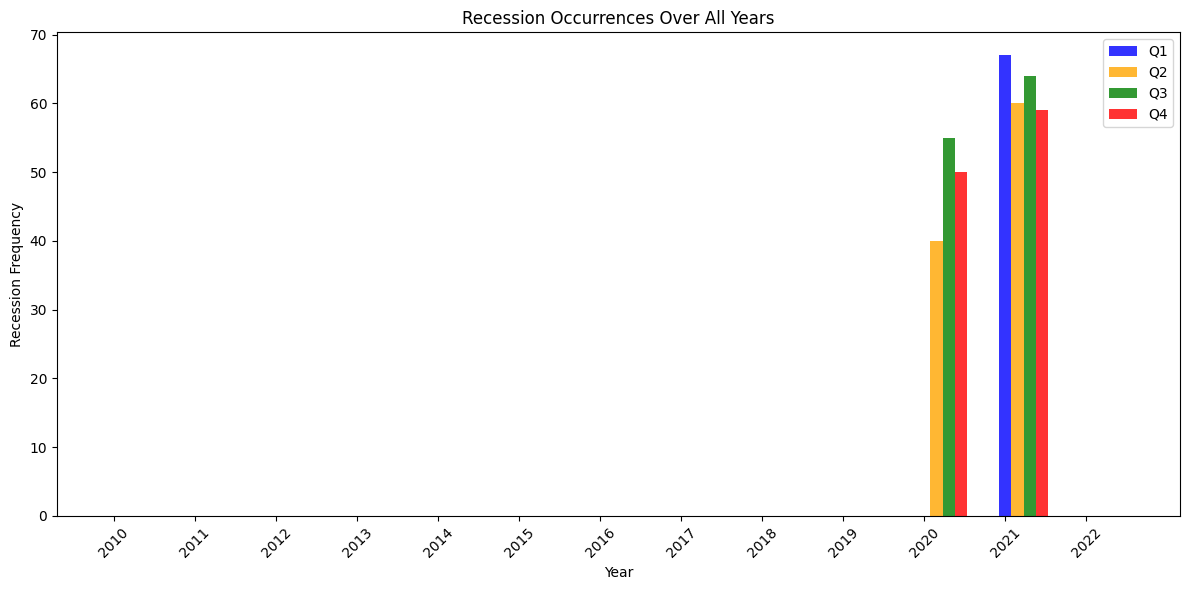

In [ ]:
# Grouping by year and quarter and counting occurrences of recession
recession_counts = df.groupby(['Year', 'Quarter'])['Recession_Indicator'].sum().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(12, 6))

quarters = ['Q1', 'Q2', 'Q3', 'Q4']
bar_width = 0.15
opacity = 0.8
index = range(len(recession_counts))

colors = ['blue', 'orange', 'green', 'red']

for i, quarter in enumerate(quarters):
    plt.bar([x + i * bar_width for x in index], recession_counts[quarter], bar_width,
            alpha=opacity, color=colors[i], label=quarter)

plt.xlabel('Year')
plt.ylabel('Recession Frequency')
plt.title('Recession Occurrences Over All Years')
plt.xticks(index, recession_counts.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Extract the relevant columns
quarters = df['Year'].astype(str) + '-' + df['Quarter']
inflation = df['Inflation']
gdp_growth = df['GDP_Growth']
industrial_production = df['Industrial_Production']

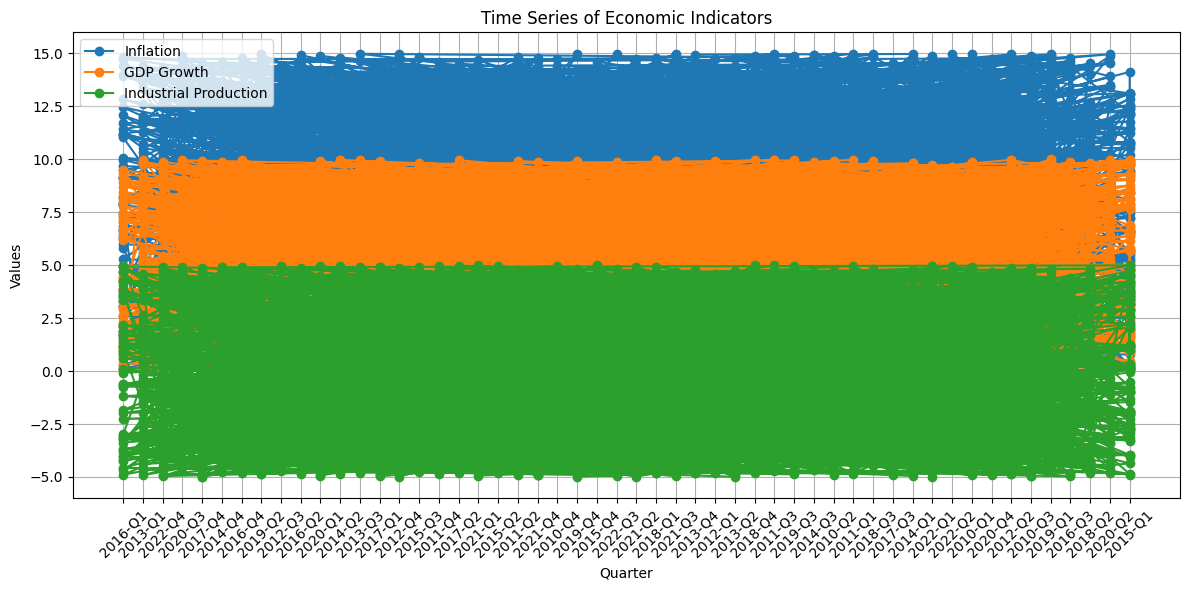

In [ ]:
# Create a line graph
plt.figure(figsize=(12, 6))
plt.plot(quarters, inflation, label='Inflation', marker='o')
plt.plot(quarters, gdp_growth, label='GDP Growth', marker='o')
plt.plot(quarters, industrial_production, label='Industrial Production', marker='o')

plt.xlabel('Quarter')
plt.ylabel('Values')
plt.title('Time Series of Economic Indicators')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()